# Week - 8
# Distance and Distance Matrix


#### 1.Take two 3D coordinates from the user. Find out the distance between these points using following distance functions. x and y are vectors representing the coordinates of two points. Here, k=3

In [7]:
import math

def euclidean_distance(point1, point2):
    return math.sqrt(sum([(x - y) ** 2 for x, y in zip(point1, point2)]))

def manhattan_distance(point1, point2):
    return sum([abs(x - y) for x, y in zip(point1, point2)])

def minkowski_distance(point1, point2, p):
    return sum([abs(x - y) ** p for x, y in zip(point1, point2)]) ** (1/p)

point1 = []
point2 = []

print("Enter the coordinates for the first point:")
for i in range(3):
    point1.append(float(input(f"Enter coordinate {i + 1}: ")))

print("\nEnter the coordinates for the second point:")
for i in range(3):
    point2.append(float(input(f"Enter coordinate {i + 1}: ")))

p = float(input("\nEnter the value of p for Minkowski distance: "))

euclidean_dist = euclidean_distance(point1, point2)
manhattan_dist = manhattan_distance(point1, point2)
minkowski_dist = minkowski_distance(point1, point2, p)

print("\nEuclidean Distance:", euclidean_dist)
print("Manhattan Distance:", manhattan_dist)
print(f"Minkowski Distance (p={p}):", minkowski_dist)


Enter the coordinates for the first point:
Enter coordinate 1: 2
Enter coordinate 2: 3
Enter coordinate 3: 5

Enter the coordinates for the second point:
Enter coordinate 1: 5
Enter coordinate 2: 3
Enter coordinate 3: 7

Enter the value of p for Minkowski distance: 9

Euclidean Distance: 3.605551275463989
Manhattan Distance: 5.0
Minkowski Distance (p=9.0): 3.0085721336278413


#### 2.Import the Iris dataset. Write a program to obtain the Euclidian Distance Matrix for all the data samples in the feature space. Distance metric is a 2D array, where the (i,j)th entry represents the distance between the ith and jth sample points in the feature space.

In [3]:
import numpy as np
from sklearn.datasets import load_iris

iris = load_iris()
data = iris.data

def euclidean_distance(p1, p2):
    return np.linalg.norm(p1 - p2)

def euclidean_distance_matrix(data):
    n = len(data)
    distance_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            distance_matrix[i, j] = euclidean_distance(data[i], data[j])
    return distance_matrix

distance_matrix = euclidean_distance_matrix(data)

print("Euclidean Distance Matrix:")
print(distance_matrix)


Euclidean Distance Matrix:
[[0.         0.53851648 0.50990195 ... 4.45982062 4.65080638 4.14004831]
 [0.53851648 0.         0.3        ... 4.49888875 4.71805044 4.15331193]
 [0.50990195 0.3        0.         ... 4.66154481 4.84871117 4.29883705]
 ...
 [4.45982062 4.49888875 4.66154481 ... 0.         0.6164414  0.64031242]
 [4.65080638 4.71805044 4.84871117 ... 0.6164414  0.         0.76811457]
 [4.14004831 4.15331193 4.29883705 ... 0.64031242 0.76811457 0.        ]]


#### 3.Import the Iris dataset. Prepare a dataset considering samples belong to any two output classes. Draw the scatter plot for all the samples in the new dataset considering any two input attributes. Examine the scatter plot to find the equation of a line that can separate sample of two classes.

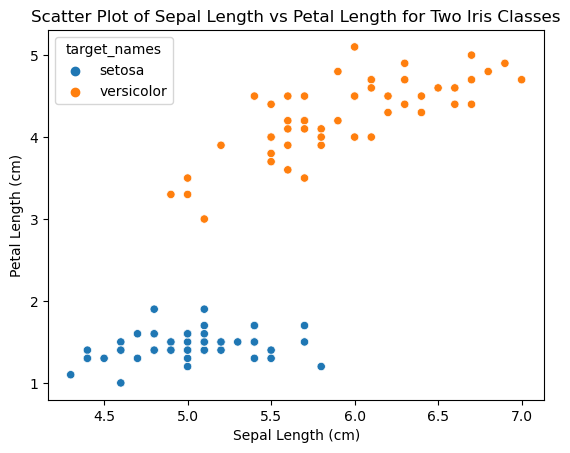

Equation of the separating line: 0.23 * x + 1.32 * y + -4.49 = 0


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

target_names = dict(enumerate(iris.target_names))
iris_df['target_names'] = iris_df['target'].map(target_names)

two_class_df = iris_df[iris_df['target'].isin([0, 1])]

sns.scatterplot(data=two_class_df, x='sepal length (cm)', y='petal length (cm)', hue='target_names')
plt.title('Scatter Plot of Sepal Length vs Petal Length for Two Iris Classes')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.show()

X = two_class_df[['sepal length (cm)', 'petal length (cm)']]
y = two_class_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_classifier = SVC(kernel='linear')

svm_classifier.fit(X_train, y_train)

coefficients = svm_classifier.coef_[0]
intercept = svm_classifier.intercept_[0]

print(f"Equation of the separating line: {coefficients[0]:.2f} * x + {coefficients[1]:.2f} * y + {intercept:.2f} = 0")
